In [1]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
#from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob

In [3]:
Image_size=[224,224]
train_path='data/train'
test_path='data/test'

In [4]:
inception=InceptionV3(input_shape=Image_size+[3],weights='imagenet',include_top=False)

In [5]:
for layer in inception.layers:
    layer.trainable=False


In [6]:
folders=glob('data/train/*')

In [7]:
x=Flatten()(inception.output)

In [8]:
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=inception.input,outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

__________________________________________________________________________________________________
batch_normalization_75 (BatchNo (None, 5, 5, 192)    576         conv2d_75[0][0]                  
__________________________________________________________________________________________________
activation_71 (Activation)      (None, 5, 5, 320)    0           batch_normalization_71[0][0]     
__________________________________________________________________________________________________
activation_75 (Activation)      (None, 5, 5, 192)    0           batch_normalization_75[0][0]     
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 5, 5, 768)    0           mixed7[0][0]                     
__________________________________________________________________________________________________
mixed8 (Concatenate)            (None, 5, 5, 1280)   0           activation_71[0][0]              
          

In [10]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
training_set=train_datagen.flow_from_directory('data/train',
                                               target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set=test_datagen.flow_from_directory('data/test',
                                               target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 18 images belonging to 4 classes.


In [35]:
from tensorflow.keras.models import load_model



In [18]:
r_1=model.fit_generator(
training_set,
validation_data=test_set,
epochs=20,
steps_per_epoch=len(training_set),
validation_steps=len(test_set)
)

Epoch 1/20
61/61 [==============================] - 129s 2s/step - loss: 0.6272 - accuracy: 0.9052 - val_loss: 4.6642 - val_accuracy: 0.5556
Epoch 2/20
61/61 [==============================] - 115s 2s/step - loss: 0.4768 - accuracy: 0.9262 - val_loss: 3.6686 - val_accuracy: 0.6111
Epoch 3/20
61/61 [==============================] - 121s 2s/step - loss: 0.5270 - accuracy: 0.9165 - val_loss: 5.5179 - val_accuracy: 0.4444
Epoch 4/20
61/61 [==============================] - 127s 2s/step - loss: 0.4154 - accuracy: 0.9267 - val_loss: 6.1171 - val_accuracy: 0.3889
Epoch 5/20
61/61 [==============================] - 127s 2s/step - loss: 0.4734 - accuracy: 0.9267 - val_loss: 5.8282 - val_accuracy: 0.4444
Epoch 6/20
61/61 [==============================] - 121s 2s/step - loss: 0.3520 - accuracy: 0.9390 - val_loss: 4.8135 - val_accuracy: 0.6111
Epoch 7/20
61/61 [==============================] - 60s 985ms/step - loss: 0.4052 - accuracy: 0.9318 - val_loss: 4.9674 - val_accuracy: 0.6111
Epoch 8/20


In [19]:
model.save('model_fitgen_inception.h5')

In [20]:
import matplotlib.pyplot as plt

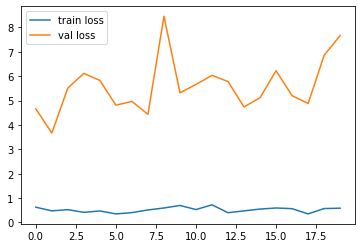

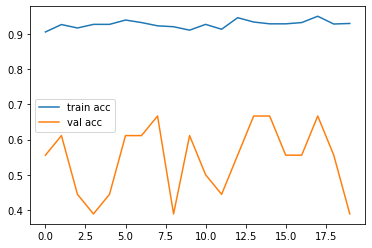

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(r_1.history['loss'],label='train loss')
plt.plot(r_1.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('lossval_loss')
plt.plot(r_1.history['accuracy'],label='train acc')
plt.plot(r_1.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
y_pred=model.predict(test_set)

In [25]:
y_pred

array([[1.0436643e-34, 1.0000000e+00, 3.6650626e-26, 1.1055015e-09],
       [4.4070653e-06, 1.3241660e-02, 9.8675388e-01, 1.9094006e-11],
       [8.2431242e-19, 9.9444491e-01, 1.8148624e-10, 5.5550826e-03],
       [2.8347723e-02, 5.7529390e-04, 9.7079247e-01, 2.8446937e-04],
       [0.0000000e+00, 1.0000000e+00, 6.5907500e-35, 1.6457251e-36],
       [3.5649651e-34, 1.0000000e+00, 5.0570633e-20, 2.6168844e-19],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.5254086e-26, 1.0000000e+00, 7.3504716e-26, 7.9814038e-22],
       [4.3075237e-34, 1.0000000e+00, 2.6362924e-34, 6.9684797e-18],
       [2.0091503e-15, 7.5733675e-10, 1.0000000e+00, 3.2960610e-11],
       [1.3671925e-15, 3.3417019e-11, 1.4653331e-10, 1.0000000e+00],
       [1.3206348e-23, 9.9974674e-01, 2.8012383e-16, 2.5326139e-04],
       [3.0250690e-22, 1.7592400e-12, 1.9290384e-13, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 6.1682935e-33],
       [1.1825857e-22, 9.9999368e-

In [26]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [27]:
y_pred

array([1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 1, 1, 2, 1], dtype=int64)

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:
model=load_model('model_fitgen_inception.h5')

In [4]:
img=image.load_img('C:\\Users\\user\\Desktop\\dis_leaf (124).jpg',target_size=(224,224))

In [5]:

x=image.img_to_array(img)
x

array([[[ 86.,  84.,  71.],
        [ 83.,  85.,  72.],
        [ 77.,  75.,  62.],
        ...,
        [116.,  96.,  85.],
        [148., 128., 117.],
        [135., 115., 104.]],

       [[134., 130., 119.],
        [103., 100.,  83.],
        [ 99.,  97.,  84.],
        ...,
        [105.,  88.,  80.],
        [127., 107.,  96.],
        [127., 107.,  96.]],

       [[152., 143., 138.],
        [163., 153., 143.],
        [ 80.,  77.,  60.],
        ...,
        [112.,  95.,  87.],
        [127., 107.,  96.],
        [126., 107.,  93.]],

       ...,

       [[170., 183., 137.],
        [114., 116.,  94.],
        [ 88.,  79.,  74.],
        ...,
        [157., 139., 135.],
        [150., 135., 130.],
        [117., 106., 102.]],

       [[151., 157., 119.],
        [ 99.,  93.,  77.],
        [ 95.,  86.,  81.],
        ...,
        [133., 116., 109.],
        [116., 101.,  94.],
        [121., 110., 106.]],

       [[104.,  97.,  79.],
        [ 99.,  90.,  81.],
        [ 88.,  

In [6]:
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [7]:
model.predict(img_data)
a=np.argmax(model.predict(img_data),axis=1)
a

array([1], dtype=int64)